# ENSF 444: Project Source Code


### Group 121: Raghav Adlakha, Joseph Kimambo 


Source for dataset:
Cortez, Paulo. (2014). Student Performance. UCI Machine Learning Repository.

@misc{misc_student_performance_320, author = {Cortez, Paulo}, title = {{Student Performance}}, year = {2014}, howpublished = {UCI Machine Learning Repository} }

Link to dataset: https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study 


Please run the following command in your terminal prior to running the code below:



In [82]:
# pip install kagglehub[pandas-datasets] scikit-learn pandas matplotlib seaborn

## Part 1: Pre-Processing 



In [83]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

# Load the dataset
file_path = "Maths.csv"  
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "whenamancodes/alcohol-effects-on-study",
    file_path,
)

# Display first few records
print("First 5 records:\n", df.head())

# Clean data
print("\nMissing values:\n", df.isnull().sum())
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# G3 is the final grade so it is the target
X = df.drop("G3", axis=1)  
y = df["G3"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

First 5 records:
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Missing values:
 school        0
sex           0
age           0
addr

## Part 2: Implementing Models 



In [84]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

print("\nLinear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best estimator prediction
y_pred_rf = grid_rf.predict(X_test)

# Best model from grid search
best_rf = grid_rf.best_estimator_

# Training and Test scores
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_test, y_test)


print("\n Random Forest Regressor Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


#SVM
svm_reg = SVR()
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(svm_reg, param_grid, cv=3, scoring='r2')
grid_svm.fit(X_train_scaled, y_train)
y_pred_svm = grid_svm.predict(X_test_scaled)

print("\nSupport Vector Machine Results:")
print("Best Params:", grid_svm.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred_svm))
print("R² Score:", r2_score(y_test, y_pred_svm))


Linear Regression Results:
MAE: 1.6103326329571053
R² Score: 0.7881321321158564

 Random Forest Regressor Results:
MAE: 1.1241694293751257
R² Score: 0.8727473498316858

Support Vector Machine Results:
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
MAE: 1.2862097516346545
R² Score: 0.7790932483817119


In [85]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)



G2                   0.787856
absences             0.118813
age                  0.011434
schoolsup_yes        0.006752
health               0.006398
G1                   0.006139
freetime             0.005702
activities_yes       0.005682
famrel               0.004975
failures             0.004275
Walc                 0.004011
reason_home          0.003561
Fedu                 0.002888
Medu                 0.002495
goout                0.002414
studytime            0.002347
Mjob_teacher         0.002246
school_MS            0.002163
paid_yes             0.001900
romantic_yes         0.001624
Fjob_other           0.001361
Mjob_services        0.001313
traveltime           0.001229
Dalc                 0.001216
famsize_LE3          0.001060
nursery_yes          0.001036
reason_reputation    0.000971
Fjob_services        0.000947
reason_other         0.000886
internet_yes         0.000818
Mjob_other           0.000692
guardian_mother      0.000642
Mjob_health          0.000640
famsup_yes

## Part 3: Visualizing Results

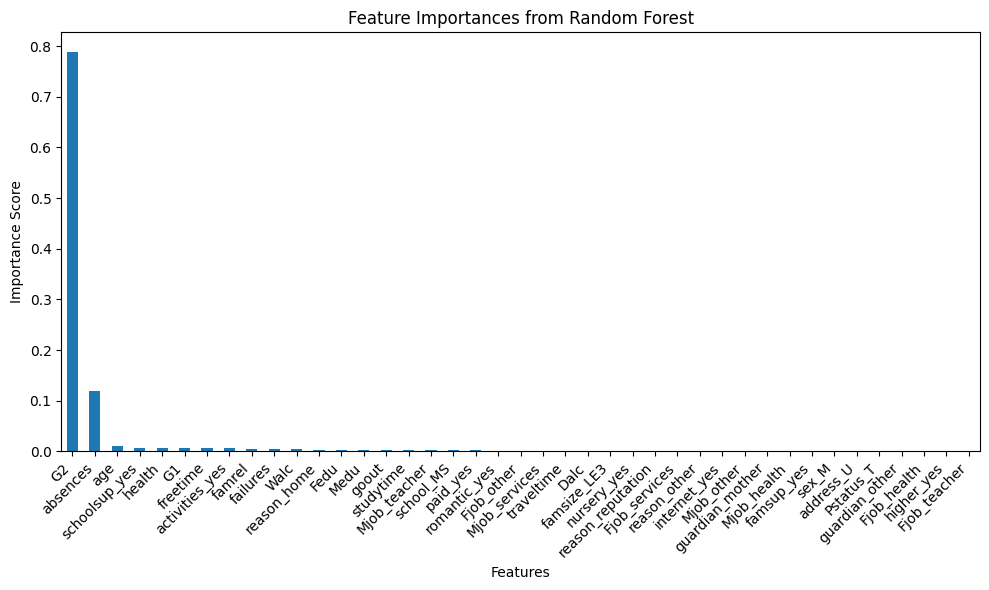

In [86]:
import matplotlib.pyplot as plt

importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Part 4 - Revaluation
 After looking at current results, we determined that the G2 and G1 values are good predictors for the G3 grades a student will have at the end of the year. To have more talking points of data we analysed, a TA suggested we try remove G2 and G1  and analyse the dat then. We also decided that we would add a correlation matrix to have more results to analyse. 

In [87]:
correlation_with_g3 = df.corr(numeric_only=True)['G3']
correlation_with_g3_abs = correlation_with_g3.abs().sort_values(ascending=False)
print(correlation_with_g3_abs)
corr_matrix = df.corr(numeric_only=True)



G3                   1.000000
G2                   0.904868
G1                   0.801468
failures             0.360415
Medu                 0.217147
higher_yes           0.182465
age                  0.161579
Fedu                 0.152457
goout                0.132791
romantic_yes         0.129970
traveltime           0.117142
Mjob_health          0.116158
address_U            0.105756
sex_M                0.103456
paid_yes             0.101996
internet_yes         0.098483
studytime            0.097820
Mjob_other           0.096477
reason_reputation    0.095692
Fjob_teacher         0.095374
guardian_other       0.087774
schoolsup_yes        0.082788
famsize_LE3          0.081407
Mjob_services        0.078429
health               0.061335
Pstatus_T            0.058009
Mjob_teacher         0.057712
Fjob_health          0.057111
Dalc                 0.054660
Fjob_other           0.053483
reason_other         0.052008
Walc                 0.051939
nursery_yes          0.051568
famrel    


Linear Regression Results:
MAE: 3.8082432914406548
R² Score: 0.16173286392318165

Random Forest Regressor Results:
MAE: 3.5337667454180703
R² Score: 0.22679447810425712

Support Vector Machine Results:
Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
MAE: 3.771494929359465
R² Score: 0.11917314592860195

New Feature importance:
absences             0.227247
failures             0.153131
goout                0.043452
age                  0.042767
studytime            0.039825
traveltime           0.035705
Medu                 0.033711
guardian_other       0.029922
freetime             0.029860
health               0.029151
Fedu                 0.027502
higher_yes           0.026129
Walc                 0.025892
Fjob_teacher         0.020748
Mjob_services        0.019085
schoolsup_yes        0.018257
Fjob_other           0.015726
sex_M                0.014842
Dalc                 0.014454
famrel               0.014251
internet_yes         0.012871
school_MS            0.011947
M

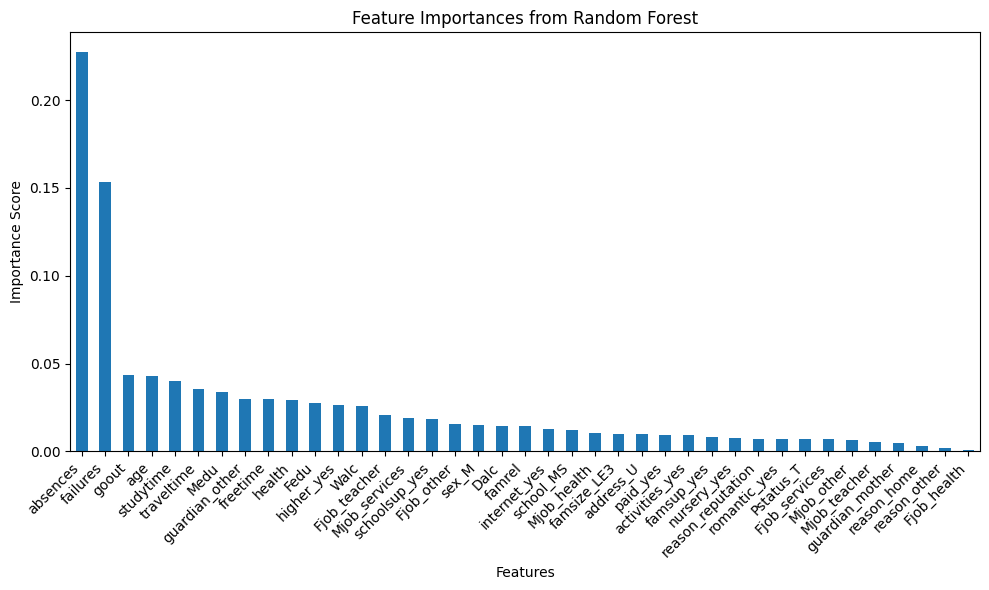

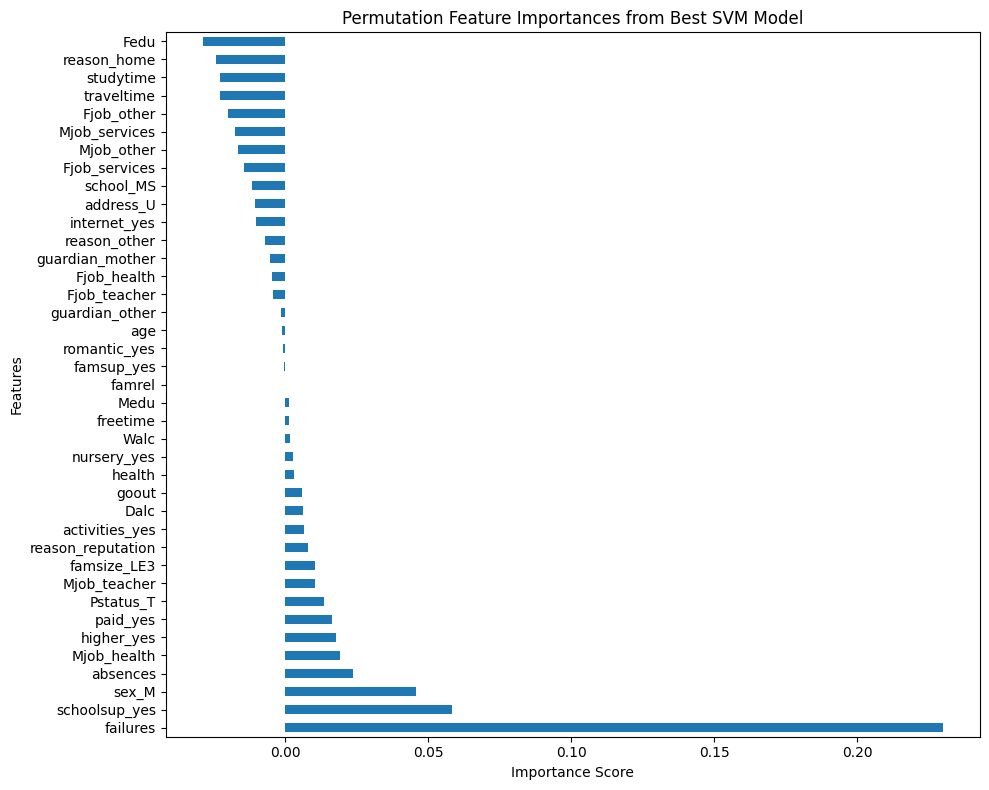

In [88]:
from sklearn.inspection import permutation_importance

numeric_cols = df.select_dtypes(include='number').columns.drop('G3')



X = df.drop(["G3", "G2", "G1" ], axis=1)
y = df["G3"]


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

print("\nLinear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best estimator prediction
y_pred_rf = grid_rf.predict(X_test)

# Best model from grid search
best_rf = grid_rf.best_estimator_

# Training and Test scores
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_test, y_test)


print("\nRandom Forest Regressor Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


#SVM
svm_reg = SVR()
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(svm_reg, param_grid, cv=3, scoring='r2')
grid_svm.fit(X_train_scaled, y_train)
y_pred_svm = grid_svm.predict(X_test_scaled)

print("\nSupport Vector Machine Results:")
print("Best Params:", grid_svm.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred_svm))
print("R² Score:", r2_score(y_test, y_pred_svm))

importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print("\nNew Feature importance:")
print(importances)


plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

best_svm = grid_svm.best_estimator_
results = permutation_importance(grid_svm.best_estimator_, X_test_scaled, y_test, scoring='r2')
importances = pd.Series(results.importances_mean, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
importances.plot(kind='barh')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Permutation Feature Importances from Best SVM Model")
plt.tight_layout()
plt.show()

## Part 4 - Step 2
 Removing G2 and G1 had a very negative effect on the model's accuracy. This is likely becasue those features were simply way more important compared to the other features. However, its worth trying to remove less important features that maybe contributing to noise.


Linear Regression Results:
MAE: 3.7077533726143326
R² Score: 0.20544320563433183

Random Forest Regressor Results:
MAE: 3.599050253640043
R² Score: 0.19659284830655743

Support Vector Machine Results:
Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
MAE: 3.768554807895264
R² Score: 0.10321792496297011

New Feature importance:
absences          0.254488
failures          0.164646
goout             0.057004
age               0.055120
studytime         0.051401
traveltime        0.048722
freetime          0.045468
Medu              0.044931
health            0.044876
Walc              0.042908
Fedu              0.039485
guardian_other    0.033561
higher_yes        0.031122
Mjob_services     0.027259
famrel            0.026388
schoolsup_yes     0.024530
romantic_yes      0.008091
dtype: float64


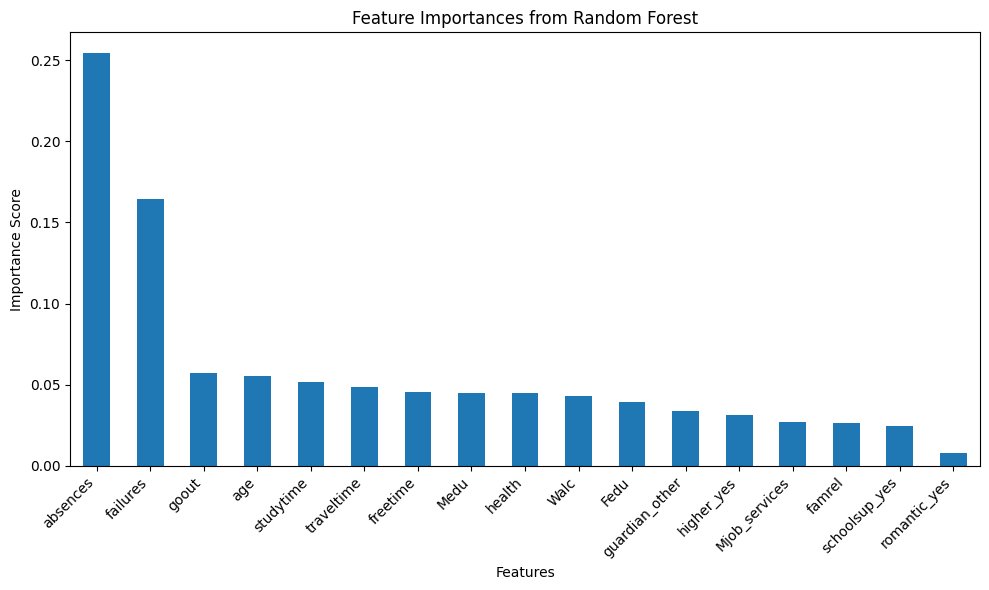

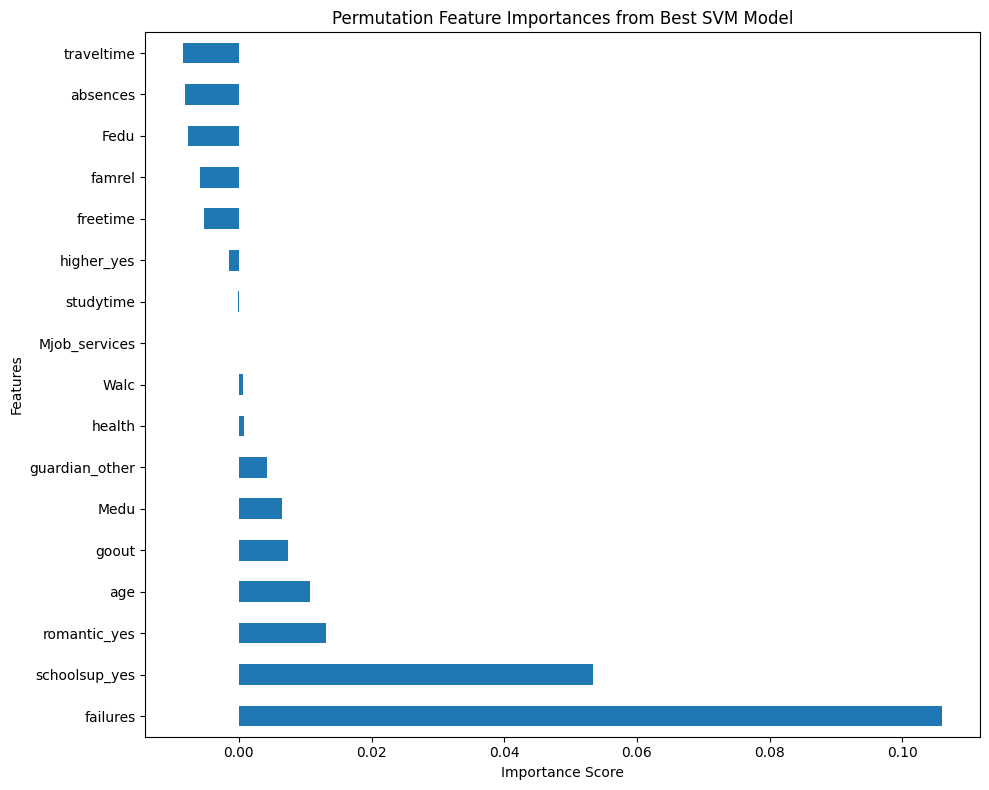

In [89]:
X = df.drop(["G3", "G2", "G1",'famsup_yes', 'sex_M', 'internet_yes', 'activities_yes', 'Dalc',
    'reason_home', 'famsize_LE3', 'paid_yes', 'reason_reputation',
    'Fjob_other', 'Pstatus_T', 'Mjob_other', 'nursery_yes',
    'guardian_mother', 'Fjob_teacher', 'Fjob_services', 'address_U',
    'school_MS', 'Mjob_health', 'reason_other', 'Mjob_teacher',
    'Fjob_health'], axis=1)


y = df["G3"]
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

print("\nLinear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best estimator prediction
y_pred_rf = grid_rf.predict(X_test)

# Best model from grid search
best_rf = grid_rf.best_estimator_

# Training and Test scores
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_test, y_test)


print("\nRandom Forest Regressor Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


#SVM
svm_reg = SVR()
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(svm_reg, param_grid, cv=3, scoring='r2')
grid_svm.fit(X_train_scaled, y_train)
y_pred_svm = grid_svm.predict(X_test_scaled)

print("\nSupport Vector Machine Results:")
print("Best Params:", grid_svm.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred_svm))
print("R² Score:", r2_score(y_test, y_pred_svm))

importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print("\nNew Feature importance:")
print(importances)


plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

best_svm = grid_svm.best_estimator_
results = permutation_importance(grid_svm.best_estimator_, X_test_scaled, y_test, scoring='r2')
importances = pd.Series(results.importances_mean, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
importances.plot(kind='barh')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Permutation Feature Importances from Best SVM Model")
plt.tight_layout()
plt.show()